In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper_fun as mf
import seaborn as sns
import random
%matplotlib inline


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [2]:
mtx = pd.read_csv ('Ulas_raw_files/20160408_orfs2features_ALLINFO.txt', sep='\t')
# mtx = pd.read_csv ('rplo_analysis/20160531_rploORF_metabolites_normalized_for_clustering.csv', sep = ',')

In [6]:
mtx.head(30)

,orf,scaffold,scaffold.bin,scaffold.length,scaffold.gc,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,...,gyrA,gyrB,hisS,leuS,pheS,polA,recA,secY,valS,orftrseq
0,k101_187_1_1,k101_187,unbinned,2117,0.705716,0.019,0.011,0.000,0.011,0.010,...,0,0,0,0,0,0,0,0,0,MIKLRSSRRRRLTAALVASSAALAMGSVALAPAAHAAGPTAVAVVG...
1,k101_187_1_2,k101_187,unbinned,2117,0.705716,0.016,0.000,0.000,0.000,0.016,...,0,0,0,0,0,0,0,0,0,MAQLWPDEHPDHLGNRLSVALATVRSVLDPTHEHPNDHYVVADGLA...
2,k101_188_2_1,k101_188,unbinned,2204,0.614791,0.125,0.106,0.182,0.069,0.314,...,0,0,0,0,0,0,0,0,0,MAVAEITDATFEGEVLSAEKPVIVDFWAPWCVPCKRISPILDEMSE...
3,k101_188_2_2,k101_188,unbinned,2204,0.614791,0.036,0.000,0.069,0.079,0.183,...,0,0,0,0,0,0,0,0,0,MKFKPLGERALVKMVEREQTTESGIVLPDTAKEKPQTAEVVAVGQF...
4,k101_188_2_3,k101_188,unbinned,2204,0.614791,0.172,0.092,0.221,0.020,0.220,...,0,0,0,0,0,0,0,0,0,MRALRIGDRGREVVDLQTRLLALGLDLGNRGIDGVFGPQTGLAVKT...
5,k101_188_2_4,k101_188,unbinned,2204,0.614791,0.000,0.000,0.075,0.000,0.000,...,0,0,0,0,0,0,0,0,0,MIGSMLIWKRMWGSAPGRPKLEDYVDRLLERSAGMKISE
6,k101_195_3_1,k101_195,unbinned,2183,0.432432,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,MNSNLLEKDVPKKGHPKGLYVLFATEMWERFNYYGMRAILTLFMIN...
7,k101_195_3_2,k101_195,unbinned,2183,0.432432,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,MNILLLGSGGREHALAWKLTQSNFYSQLFIAPGNTGTALHGTNLPF...
8,k101_216_4_1,k101_216,unbinned,2342,0.692570,0.000,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,TYPFWMGEPEDIAAIALFLASNESRMITGAAIAADGGRSAY
9,k101_216_4_2,k101_216,unbinned,2342,0.692570,0.010,0.000,0.000,0.033,0.000,...,0,0,0,0,0,0,0,0,0,MSSIPHPISRRVLLGGAAAVLAAPAIAQPAWPTRPIRLLVGYPAGG...


In [4]:
for x in mtx.keys():
    print x

orf
scaffold
scaffold.bin
scaffold.length
scaffold.gc
rpkm.1A_stage=early_timepoint=3min_MG
rpkm.1B_stage=earlymid_timepoint=3min_MG
rpkm.1C_stage=latemid_timepoint=3min_MG
rpkm.1D_stage=late_timepoint=3min_MG
rpkm.1E_stage=early_timepoint=9h_MG
rpkm.2A_stage=earlymid_timepoint=9h_MG
rpkm.2B_stage=latemid_timepoint=9h_MG
rpkm.2C_stage=late_timepoint=9h_MG
rpkm.2D_stage=early_timepoint=18h_MG
rpkm.2E_stage=earlymid_timepoint=18h_MG
rpkm.3A_stage=latemid_timepoint=18h_MG
rpkm.3B_stage=late_timepoint=18h_MG
rpkm.3C_stage=early_timepoint=42h_MG
rpkm.3D_stage=earlymid_timepoint=42h_MG
rpkm.3E_stage=latemid_timepoint=42h_MG
rpkm.4A_stage=late_timepoint=42h_MG
rpkm.4B_stage=early_timepoint=49.5h_MG
rpkm.4C_stage=earlymid_timepoint=49.5h_MG
rpkm.4D_stage=latemid_timepoint=49.5h_MG
rpkm.4E_stage=late_timepoint=49.5h_MG
rpkm.5A_stage=early_timepoint=dry_MG
rpkm.5B_stage=earlymid_timepoint=dry_MG
rpkm.5C_stage=latemid_timepoint=dry_MG
rpkm.5D_stage=late_timepoint=dry_MG
rpkm.6A_stage=early_timepo

# search block: search columns for something and create new dataframe (i.e. of transporter orfs)

In [154]:
# trans_df = mtx[mtx['uniref_maxid.target.annotation'].astype(str).str.contains("eps")]
# bins_df = mtx[mtx['orf'].astype(str).str.contains("k101_38832691_794588_3")]
# bin_287 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b287")]
# bin_193 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b193")]
# bin_22 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b22")]
# bin_160 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b160")]
# bin_131 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b131")]
# bin_155 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b155")]
# bin_149 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b149")]

bin_279 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b279")]
bin_99 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b99")]
bin_207 = mtx[mtx['scaffold.bin'].astype(str).str.contains("b207")]



# bins_df = mtx[mtx['orf'].astype(str).str.contains("k101_19521223_445311_5")]
# trans_df = mtx[mtx['uniref_maxid.target.annotation'].astype(str).str.contains("ammonia monooxygenase")]
# trans_df2 = trans_df[trans_df['uniref_maxid.target.annotation'].astype(str).str.contains("bisphosphate")]
# trans_df.info()
# trans_df.head()
# # trans_df.head()
# bins_df.to_csv('bins/20160703_bin61_orfs.csv')
# bins_df.to_csv('bins/20160801_bin18_aacluster.csv')

In [155]:
allframes = [bin_279, bin_99, bin_207]
cluster3 = pd.concat(allframes)

In [156]:
cluster3.shape

(28396, 146)

In [123]:
bins_df.to_csv('bins/20160801_bin17_aacluster.csv')
# trans_df.to_csv('20160703_eps_containing_annotation.csv')

# sum specified columns and create new df

In [142]:
### Sum the MG columns of above df

col_list= ['rpkm.1A_stage=early_timepoint=3min_MG','rpkm.1B_stage=earlymid_timepoint=3min_MG','rpkm.1C_stage=latemid_timepoint=3min_MG',
           'rpkm.1D_stage=late_timepoint=3min_MG','rpkm.1E_stage=early_timepoint=9h_MG', 'rpkm.2A_stage=earlymid_timepoint=9h_MG',
           'rpkm.2B_stage=latemid_timepoint=9h_MG', 'rpkm.2C_stage=late_timepoint=9h_MG', 'rpkm.2D_stage=early_timepoint=18h_MG',
           'rpkm.2E_stage=earlymid_timepoint=18h_MG','rpkm.3A_stage=latemid_timepoint=18h_MG','rpkm.3B_stage=late_timepoint=18h_MG',
           'rpkm.3C_stage=early_timepoint=42h_MG', 'rpkm.3D_stage=earlymid_timepoint=42h_MG','rpkm.3E_stage=latemid_timepoint=42h_MG',
           'rpkm.4A_stage=late_timepoint=42h_MG','rpkm.4B_stage=early_timepoint=49.5h_MG','rpkm.4C_stage=earlymid_timepoint=49.5h_MG',
           'rpkm.4D_stage=latemid_timepoint=49.5h_MG','rpkm.4E_stage=late_timepoint=49.5h_MG']
print col_list

['rpkm.1A_stage=early_timepoint=3min_MG', 'rpkm.1B_stage=earlymid_timepoint=3min_MG', 'rpkm.1C_stage=latemid_timepoint=3min_MG', 'rpkm.1D_stage=late_timepoint=3min_MG', 'rpkm.1E_stage=early_timepoint=9h_MG', 'rpkm.2A_stage=earlymid_timepoint=9h_MG', 'rpkm.2B_stage=latemid_timepoint=9h_MG', 'rpkm.2C_stage=late_timepoint=9h_MG', 'rpkm.2D_stage=early_timepoint=18h_MG', 'rpkm.2E_stage=earlymid_timepoint=18h_MG', 'rpkm.3A_stage=latemid_timepoint=18h_MG', 'rpkm.3B_stage=late_timepoint=18h_MG', 'rpkm.3C_stage=early_timepoint=42h_MG', 'rpkm.3D_stage=earlymid_timepoint=42h_MG', 'rpkm.3E_stage=latemid_timepoint=42h_MG', 'rpkm.4A_stage=late_timepoint=42h_MG', 'rpkm.4B_stage=early_timepoint=49.5h_MG', 'rpkm.4C_stage=earlymid_timepoint=49.5h_MG', 'rpkm.4D_stage=latemid_timepoint=49.5h_MG', 'rpkm.4E_stage=late_timepoint=49.5h_MG']


In [157]:
### Sum the columns in col_l
cluster3['SUM'] = cluster3[col_list].sum(axis=1)
cluster3.head()

,orf,scaffold,scaffold.bin,scaffold.length,scaffold.gc,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,...,gyrB,hisS,leuS,pheS,polA,recA,secY,valS,orftrseq,SUM
114,k101_1486_34_1,k101_1486,b279,4872,0.362479,0.000,0,0,0.000,4.808,...,0,0,0,0,0,0,0,0,MQERDYYFDNAKFVLIFLVVFGHFLRPYIEENQFVHSMYVWIFLFH...,39.557
115,k101_1486_34_2,k101_1486,b279,4872,0.362479,0.000,0,0,0.057,4.299,...,0,0,0,0,0,0,0,0,MNVARAKQIAESGEIIPVYYEDTQVVIQHVDEKNETARVYPRNNPE...,36.553
116,k101_1486_34_3,k101_1486,b279,4872,0.362479,0.000,0,0,0.000,3.689,...,0,0,0,0,0,0,0,0,MSLGFGEIALIVFLALLIFGPKKLPELGKAAGKTLREFKNATKGIM...,31.134
117,k101_1486_34_4,k101_1486,b279,4872,0.362479,0.000,0,0,0.000,8.484,...,0,0,0,0,0,0,0,0,MLKKLFSIFIGSVLLGIGINVFLVPHQLLDGGIIGIGLIIKYLWNI...,75.843
118,k101_1486_34_5,k101_1486,b279,4872,0.362479,0.011,0,0,0.000,7.575,...,0,0,0,0,0,0,0,0,MVDPVVGLHKIFRWGMCGAHFALNWCYWFFKGKENKNIHCNSVMNS...,63.027


# Make a table of all orfs, bin it belongs to, uniref annotation (cytoscape metadata)

In [96]:
mtx['uniref_maxid.target.annotation'].head()

0    Calcium_binding_hemolysin_protein_(Fragment)
1                                             NaN
2                                     Thioredoxin
3                               10_kDa_chaperonin
4                                             NaN
Name: uniref_maxid.target.annotation, dtype: object

In [97]:
bin_annot_df= mtx[['orf']+['scaffold.bin']+['uniref_maxid.target.annotation']]
bin_annot_df.head()

,orf,scaffold.bin,uniref_maxid.target.annotation
0,k101_187_1_1,unbinned,Calcium_binding_hemolysin_protein_(Fragment)
1,k101_187_1_2,unbinned,NaN
2,k101_188_2_1,unbinned,Thioredoxin
3,k101_188_2_2,unbinned,10_kDa_chaperonin
4,k101_188_2_3,unbinned,NaN


In [98]:
bin_annot_df.to_csv('20160415_orf2bin_and_unirefannotation.csv')

# Narrow down df to data required (may need to perform 'search block' first)

In [3]:
mf = reload(mf)

### Get list of keys that contain these words, function requires 2 variables, RETURNS a list of keys

annotation_keys = mf.filter_list_by_two_conditions(mtx.keys(),'uniref','interpro')
quant_mtx_keys = mf.filter_list_by_two_conditions(mtx.keys(),'_MTX','_MTX')
quant_mg_keys = mf.filter_list_by_two_conditions(mtx.keys(),'_MG','_MG')
# bin_key = 'scaffold.bin'

# print len(quant_mtx_keys)
# print quant_mtx_keys
print quant_mg_keys

['rpkm.1A_stage=early_timepoint=3min_MG', 'rpkm.1B_stage=earlymid_timepoint=3min_MG', 'rpkm.1C_stage=latemid_timepoint=3min_MG', 'rpkm.1D_stage=late_timepoint=3min_MG', 'rpkm.1E_stage=early_timepoint=9h_MG', 'rpkm.2A_stage=earlymid_timepoint=9h_MG', 'rpkm.2B_stage=latemid_timepoint=9h_MG', 'rpkm.2C_stage=late_timepoint=9h_MG', 'rpkm.2D_stage=early_timepoint=18h_MG', 'rpkm.2E_stage=earlymid_timepoint=18h_MG', 'rpkm.3A_stage=latemid_timepoint=18h_MG', 'rpkm.3B_stage=late_timepoint=18h_MG', 'rpkm.3C_stage=early_timepoint=42h_MG', 'rpkm.3D_stage=earlymid_timepoint=42h_MG', 'rpkm.3E_stage=latemid_timepoint=42h_MG', 'rpkm.4A_stage=late_timepoint=42h_MG', 'rpkm.4B_stage=early_timepoint=49.5h_MG', 'rpkm.4C_stage=earlymid_timepoint=49.5h_MG', 'rpkm.4D_stage=latemid_timepoint=49.5h_MG', 'rpkm.4E_stage=late_timepoint=49.5h_MG', 'rpkm.5A_stage=early_timepoint=dry_MG', 'rpkm.5B_stage=earlymid_timepoint=dry_MG', 'rpkm.5C_stage=latemid_timepoint=dry_MG', 'rpkm.5D_stage=late_timepoint=dry_MG', 'rpkm.6

In [4]:
### Create new df with specified columns (in this case, orfs and mtx data)

# mtx_filtered = mtx[['orf']+ quant_mtx_keys]

# mg_filtered = mtx[['scaffold.bin']+ quant_mg_keys]

# mtx2 = mtx[['orf']+ ['scaffold.bin'] + quant_mtx_keys + ['uniref_maxid.target.annotation'] ]
# mtx3 = mtx[['orf']+ quant_mtx_keys]
# mtx_bin = mtx[['orf']+ ['scaffold.bin'] + ['uniref_maxid.target.annotation']]
# mg_data = mtx[['orf']+ ['scaffold.bin'] + ['uniref_maxid.target.annotation'] + quant_mg_keys]
mg_data = mtx[['orf'] + quant_mg_keys]
# mg_bin = mtx[['orf']+ ['scaffold.bin'] + ['uniref_maxid.target.annotation']]
# cluster3_sum = cluster3[['orf']+['scaffold.bin'] + ['orftrseq']+['SUM']]
# cluster3_sum.to_csv('20160801_cluster2_bins_alllgenes_summed.csv')

# orf2bin = mtx[['orf'] + ['scaffold.bin']]
# orf2bin.to_csv('MTX_output/20160503_allORFs2bin')

In [93]:
### Remove rows with no annotation

df = mg_data[pd.notnull(mg_data['uniref_maxid.target.annotation'])]

In [95]:
df.shape

(4027571, 31)

In [96]:
df.to_csv('20160729_mg_orf_bin_annotation_unannotatedremoved.csv')

# Remove replicate ID from column heading
this helps with grouping the columns for calculation of averages

In [75]:
### Set index to first column so that all remaining columns are numeric

# mtx_filtered2 = mtx_filtered.set_index('orf')
mg_data2 = mg_data.set_index('orf')
# mtx_rm = mtx3.set_index('orf')
# mtx_rm.head()

In [21]:
mtx_tps2.shape

(4027571, 23)

In [17]:
###rename columns so replicates can be grouped together

for original_name in mtx_rm.keys():
    if ('rpkm' in original_name) and ('_MTX' in original_name):
        t = original_name.split('_')
        mtx_rm.rename(columns={original_name:t[1] + '_' + t[-1]}, inplace=True)
mtx_rm.keys()  

#this can be sped up by this
# http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
# I think it is an ordered dictionary

Index([u'timepoint=72h-priortodrydown_MTX',
       u'timepoint=72h-priortodrydown_MTX',
       u'timepoint=72h-priortodrydown_MTX', u'timepoint=2h-afterdrydown_MTX',
       u'timepoint=2h-afterdrydown_MTX', u'timepoint=2h-afterdrydown_MTX',
       u'timepoint=3min-afterwetup_MTX', u'timepoint=3min-afterwetup_MTX',
       u'timepoint=3min-afterwetup_MTX', u'timepoint=15min-afterwetup_MTX',
       u'timepoint=15min-afterwetup_MTX', u'timepoint=1h-afterwetup_MTX',
       u'timepoint=1h-afterwetup_MTX', u'timepoint=1h-afterwetup_MTX',
       u'timepoint=9h-afterwetup_MTX', u'timepoint=9h-afterwetup_MTX',
       u'timepoint=9h-afterwetup_MTX', u'timepoint=11.5h-afterwetup_MTX',
       u'timepoint=11.5h-afterwetup_MTX', u'timepoint=18h-afterwetup_MTX',
       u'timepoint=18h-afterwetup_MTX', u'timepoint=3d-afterdrydown_MTX',
       u'timepoint=3d-afterdrydown_MTX'],
      dtype='object')

# Calculate mean
Be sure all columns are numeric (set index) and keys are identical (that you want to avg)

In [18]:
### Calculate mean of similarly-named columns

# mtx_avg= mtx_filtered2.groupby(level=0, axis=1).mean()
# mtx_avg.head()

mtx_avg= mtx_rm.groupby(level=0, axis=1).mean()
mtx_avg.head()


### Stuff that didn't work:
### Grouping all columns together (that have the same name) and taking the mean
### Axis 1 refers to columns; axis 0 is rows so groupby default will group common rows (i.e. bins)

# mtx_filtered.groupby('orf').sum()
# mtx_avg= mtx_filtered.groupby(['timepoint=72h-priortodrydown_MTX','timepoint=2h-afterdrydown_MTX','timepoint=3min-afterwetup_MTX', 'timepoint=15min-afterwetup_MTX','timepoint=1h-afterwetup_MTX','timepoint=9h-afterwetup_MTX','timepoint=11.5h-afterwetup_MTX', 'timepoint=18h-afterwetup_MTX', 'timepoint=3d-afterdrydown_MTX'], level = 0, axis = 1).mean()

# mtx_df.groupby(level=0,axis=1).mean()

# df.groupby(['Country', 'Item_Code'])[["Y1961", "Y1962", "Y1963"]].sum()
# data.groupby(['col1', 'col2'])['col3'].mean()
#can add multiple levels (groupnames, etc)



,timepoint=11.5h-afterwetup_MTX,timepoint=15min-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=1h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,,,
k101_187_1_1,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
k101_187_1_2,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
k101_188_2_1,2.4585,8.8530,2.1040,5.284333,1.165333,1.3815,1.659333,1.350333,1.392000
k101_188_2_2,2.8000,23.6545,2.6425,9.322000,1.404667,1.2815,1.458333,1.964667,2.291667
k101_188_2_3,0.3160,1.7020,0.4050,0.479000,0.219333,0.4775,0.247000,0.259667,0.370333


In [31]:
### Remove 15 min and 1 hour timepoints

mtx_filtered = mtx_avg[['timepoint=11.5h-afterwetup_MTX']+ ['timepoint=18h-afterwetup_MTX'] +['timepoint=2h-afterdrydown_MTX'] + ['timepoint=3d-afterdrydown_MTX'] + ['timepoint=3min-afterwetup_MTX'] + ['timepoint=72h-priortodrydown_MTX'] + ['timepoint=9h-afterwetup_MTX']]

In [32]:
mtx_filtered.head()

,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,
k101_187_1_1,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000
k101_187_1_2,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000
k101_188_2_1,2.4585,2.1040,1.165333,1.3815,1.659333,1.350333,1.392000
k101_188_2_2,2.8000,2.6425,1.404667,1.2815,1.458333,1.964667,2.291667
k101_188_2_3,0.3160,0.4050,0.219333,0.4775,0.247000,0.259667,0.370333


In [33]:
newdf = mtx_filtered.reset_index()

In [34]:
newdf.head()

,orf,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
0,k101_187_1_1,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000
1,k101_187_1_2,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000
2,k101_188_2_1,2.4585,2.1040,1.165333,1.3815,1.659333,1.350333,1.392000
3,k101_188_2_2,2.8000,2.6425,1.404667,1.2815,1.458333,1.964667,2.291667
4,k101_188_2_3,0.3160,0.4050,0.219333,0.4775,0.247000,0.259667,0.370333


In [21]:
### Save new dataframe
newdf.to_csv("MTX_output/20160728_mtx_allORFS_minus15min1hr.csv")

# mtx.to_pickle('mtx.pkl')

In [ ]:
### MERGE MULTIPLE DATAFRAMES ###

In [5]:
### Combine dataframes from above (bin, phylum, averaged values)
# phyla = pd.read_csv ('MTX_output/20160502_orf2bin2phylum.txt', sep='\t')
# phyla.head(25)

keggdf = pd.read_csv('20160729_geneanalysis/20160802_cluster1_top10000_withKegginfo.csv')
keggdf.head()


,orf,scaffold.bin,orftrseq,SUM,seq ID,K ID,description,orthology,rpkm
0,k101_31057924_663195_4,b287,MKDRPKYSLIIPIYNEEENLAELYRRISAVMERMDGPVELILINDG...,48.035,b287_170,K20534,gtrB; polyisoprenyl-phosphate glycosyltransfer...,NaN,NaN
1,k101_31033442_662743_3,b287,MQPKYSLVIPIYNEEETLAELYRRISAVMERMDGPVELILINDGSR...,27.125,b287_811,K20534,gtrB; polyisoprenyl-phosphate glycosyltransfer...,NaN,NaN
2,k101_24382686_540333_1,b149,IAIAAGLDHARGRAVVIMDADLQHPPELIETFVERWREGYVMVYGQ...,2.110,b149_5526,K20534,gtrB; polyisoprenyl-phosphate glycosyltransfer...,NaN,NaN
3,k101_22471199_503574_5,b149,MASPSPELSVVIPVYNEGPNIGPLCTRVTSVLERITARWEIVFVDD...,1.877,b149_6363,K20534,gtrB; polyisoprenyl-phosphate glycosyltransfer...,NaN,NaN
4,k101_9339967_226909_1,b149,QAGRVLGMRPSGIRVRGRKSTPGRYFQVANPGIGWGGTDIEDPLDI...,1.876,b149_6366,K20449,hnr; 6-hydroxynicotinate reductase [EC:1.3.7.1],NaN,NaN


In [6]:
mg_merge = pd.merge(mg_data,keggdf,on='orf')
mg_merge.head()

,orf,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,rpkm.2B_stage=latemid_timepoint=9h_MG,rpkm.2C_stage=late_timepoint=9h_MG,rpkm.2D_stage=early_timepoint=18h_MG,...,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG,scaffold.bin,orftrseq,SUM,seq ID,K ID,description,orthology,rpkm
0,k101_1340_28_2,0.106,0.088,0.078,0.088,0.122,0.093,0.184,0.174,0.146,...,0.029,0.035,b149,MAINDVSCRFTPGSLTAIVGPNGAGKTTYFNLISGQLPASAGTVLV...,1.709,b149_7143,K01995,livG; branched-chain amino acid transport syst...,NaN,NaN
1,k101_1340_28_3,0.089,0.057,0.124,0.126,0.206,0.065,0.162,0.133,0.070,...,0.097,0.134,b149,MAEAAALRSPPAARPAEPILRLEGVHTHIGPYHILHGVDFEVPSGG...,1.789,b149_6756,K01996,livF; branched-chain amino acid transport syst...,NaN,NaN
2,k101_1340_28_4,0.145,0.143,0.142,0.160,0.183,0.064,0.097,0.213,0.119,...,0.060,0.048,b149,MTSTTAPAPPTELPQPKTDWIPILLVPVLAVAALPLFGDTSAWVTL...,2.021,b149_5820,K01997,livH; branched-chain amino acid transport syst...,NaN,NaN
3,k101_8248_195_1,0.049,0.333,0.024,0.041,0.086,0.087,0.079,0.146,0.258,...,0.081,0.229,b149,MSDAIVSPAAPAAVRRPAVSRAALLPWITTPALVIAFVAIWHLYVT...,1.954,b149_6056,K02050,ABC.SN.P; NitT/TauT family transport system pe...,NaN,NaN
4,k101_8248_195_2,0.082,0.120,0.046,0.091,0.084,0.166,0.050,0.093,0.220,...,0.013,0.125,b149,MSSLALEPIVEGAAPAAIALTGIEKWYGTGASPVHALARTDLAVAQ...,1.601,b149_7635,K02049,ABC.SN.A; NitT/TauT family transport system AT...,NaN,NaN


In [7]:
mg_merge.to_csv('20160729_geneanalysis/20160802_cluster2_top10000_withrpkm_kegginfo.csv')

In [97]:
df.head()

,orf,scaffold.bin,uniref_maxid.target.annotation,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,rpkm.2B_stage=latemid_timepoint=9h_MG,...,rpkm.4D_stage=latemid_timepoint=49.5h_MG,rpkm.4E_stage=late_timepoint=49.5h_MG,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG
0,k101_187_1_1,unbinned,Calcium_binding_hemolysin_protein_(Fragment),0.019,0.011,0.000,0.011,0.010,0.009,0.010,...,0.009,0.000,0.020,0.023,0.000,0.000,0.035,0.011,0.032,0.000
2,k101_188_2_1,unbinned,Thioredoxin,0.125,0.106,0.182,0.069,0.314,0.352,0.299,...,0.319,0.155,0.257,0.432,0.278,0.063,0.113,0.134,0.239,0.123
3,k101_188_2_2,unbinned,10_kDa_chaperonin,0.036,0.000,0.069,0.079,0.183,0.524,0.115,...,0.204,0.035,0.000,0.289,0.175,0.000,0.000,0.235,0.309,0.000
6,k101_195_3_1,unbinned,Uncharacterized_protein,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,k101_195_3_2,unbinned,phosphoribosylamine--glycine_ligase,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
df1 = df.ix[:,0:2]

In [79]:
### Keep rows with summed values greater than 1

sum_vals = mg_data2.sum(axis=1)
mtx_nozeros = mg_data2[sum_vals >1]
mtx_nozeros.head()

# sum_vals = mg_data2.sum(axis=1)
# mtx_nozeros = mg_data2[sum_vals >1]
# mtx_nozeros.head()

,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,rpkm.2B_stage=latemid_timepoint=9h_MG,rpkm.2C_stage=late_timepoint=9h_MG,rpkm.2D_stage=early_timepoint=18h_MG,rpkm.2E_stage=earlymid_timepoint=18h_MG,...,rpkm.4D_stage=latemid_timepoint=49.5h_MG,rpkm.4E_stage=late_timepoint=49.5h_MG,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG
orf,,,,,,,,,,,,,,,,,,,,,
k101_188_2_1,0.125,0.106,0.182,0.069,0.314,0.352,0.299,0.082,0.205,0.485,...,0.319,0.155,0.257,0.432,0.278,0.063,0.113,0.134,0.239,0.123
k101_188_2_2,0.036,0.000,0.069,0.079,0.183,0.524,0.115,0.047,0.040,0.094,...,0.204,0.035,0.000,0.289,0.175,0.000,0.000,0.235,0.309,0.000
k101_188_2_3,0.172,0.092,0.221,0.020,0.220,0.545,0.230,0.047,0.099,0.362,...,0.221,0.063,0.093,0.392,0.241,0.018,0.076,0.244,0.335,0.024
k101_188_2_4,0.000,0.000,0.075,0.000,0.000,0.130,0.155,0.000,0.000,0.129,...,0.000,0.076,0.148,0.000,0.056,0.000,0.085,0.082,0.000,0.095
k101_195_3_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [80]:
mtx_nozeros.shape

(863108, 28)

In [82]:
mtx_nozeros.head()

,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,rpkm.2B_stage=latemid_timepoint=9h_MG,rpkm.2C_stage=late_timepoint=9h_MG,rpkm.2D_stage=early_timepoint=18h_MG,rpkm.2E_stage=earlymid_timepoint=18h_MG,...,rpkm.4D_stage=latemid_timepoint=49.5h_MG,rpkm.4E_stage=late_timepoint=49.5h_MG,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG
orf,,,,,,,,,,,,,,,,,,,,,
k101_188_2_1,0.125,0.106,0.182,0.069,0.314,0.352,0.299,0.082,0.205,0.485,...,0.319,0.155,0.257,0.432,0.278,0.063,0.113,0.134,0.239,0.123
k101_188_2_2,0.036,0.000,0.069,0.079,0.183,0.524,0.115,0.047,0.040,0.094,...,0.204,0.035,0.000,0.289,0.175,0.000,0.000,0.235,0.309,0.000
k101_188_2_3,0.172,0.092,0.221,0.020,0.220,0.545,0.230,0.047,0.099,0.362,...,0.221,0.063,0.093,0.392,0.241,0.018,0.076,0.244,0.335,0.024
k101_188_2_4,0.000,0.000,0.075,0.000,0.000,0.130,0.155,0.000,0.000,0.129,...,0.000,0.076,0.148,0.000,0.056,0.000,0.085,0.082,0.000,0.095
k101_195_3_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [37]:
sum_vals = newdf.sum(axis=1)
mtx_nozeros = newdf[sum_vals !=0]
mtx_nozeros.head()

,orf,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
2,k101_188_2_1,2.4585,2.1040,1.165333,1.3815,1.659333,1.350333,1.392000
3,k101_188_2_2,2.8000,2.6425,1.404667,1.2815,1.458333,1.964667,2.291667
4,k101_188_2_3,0.3160,0.4050,0.219333,0.4775,0.247000,0.259667,0.370333
5,k101_188_2_4,0.0000,0.0000,0.000000,0.0285,0.000000,0.000000,0.000000
10,k101_216_4_3,0.0320,0.0140,0.000000,0.0000,0.017667,0.000000,0.000000


In [85]:
newdf = mtx_nozeros.reset_index()
merged_df = pd.merge(mg_bin,newdf,on='orf')

In [86]:
merged_df.head(30)

,orf,scaffold.bin,uniref_maxid.target.annotation,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,rpkm.2B_stage=latemid_timepoint=9h_MG,...,rpkm.4D_stage=latemid_timepoint=49.5h_MG,rpkm.4E_stage=late_timepoint=49.5h_MG,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG
0,k101_188_2_1,unbinned,Thioredoxin,0.125,0.106,0.182,0.069,0.314,0.352,0.299,...,0.319,0.155,0.257,0.432,0.278,0.063,0.113,0.134,0.239,0.123
1,k101_188_2_2,unbinned,10_kDa_chaperonin,0.036,0.000,0.069,0.079,0.183,0.524,0.115,...,0.204,0.035,0.000,0.289,0.175,0.000,0.000,0.235,0.309,0.000
2,k101_188_2_3,unbinned,NaN,0.172,0.092,0.221,0.020,0.220,0.545,0.230,...,0.221,0.063,0.093,0.392,0.241,0.018,0.076,0.244,0.335,0.024
3,k101_188_2_4,unbinned,NaN,0.000,0.000,0.075,0.000,0.000,0.130,0.155,...,0.000,0.076,0.148,0.000,0.056,0.000,0.085,0.082,0.000,0.095
4,k101_195_3_1,unbinned,Uncharacterized_protein,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,k101_335_5_5,unbinned,Uncharacterized_protein_(Fragment),0.201,0.303,0.389,0.419,0.250,0.351,0.262,...,0.021,0.022,0.230,0.498,0.685,0.273,0.243,0.412,0.610,0.207
6,k101_425_8_1,unbinned,Uncharacterized_protein_(Fragment),0.030,0.057,0.098,0.034,0.061,0.027,0.464,...,0.393,0.030,0.386,0.153,0.221,0.062,0.122,0.011,0.056,0.000
7,k101_425_8_2,unbinned,Tripartite_ATP-independent_periplasmic_transpo...,0.017,0.077,0.116,0.017,0.086,0.000,0.561,...,0.353,0.050,0.367,0.179,0.303,0.104,0.082,0.000,0.037,0.000
8,k101_425_8_3,unbinned,NaN,0.047,0.119,0.160,0.039,0.071,0.021,0.599,...,0.332,0.023,0.374,0.220,0.190,0.095,0.099,0.025,0.000,0.015
9,k101_426_9_3,b46,Putative_1-deoxy-D-xylulose_5-phosphate_syntha...,0.049,0.018,0.037,0.006,0.022,0.052,0.012,...,0.015,0.011,0.101,0.051,0.035,0.006,0.085,0.041,0.018,0.000


In [114]:
top1000 = pd.read_csv('20160729_geneanalysis/20160801_MG_top1000genes.csv')
top1000.head()

,orf,scaffold.bin,phylum,uniref_maxid.target.annotation,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,...,rpkm.4E_stage=late_timepoint=49.5h_MG,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG,SUM of first 20
0,k101_7262598_179001_3,unbinned,ambiguous,transposase,11.725,14.332,9.467,14.908,7.731,7.859,...,1.155,12.346,13.251,8.801,12.264,17.170,14.653,13.075,17.159,145.618
1,k101_3486875_88430_13,b279,Firmicutes,transposase,0.022,0.000,0.000,0.000,8.260,11.488,...,1.562,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.533
2,k101_7262598_179001_4,unbinned,ambiguous,NaN,7.655,10.686,5.893,11.596,4.683,3.948,...,0.381,8.425,7.080,5.166,8.901,13.655,10.867,9.377,13.275,95.360
3,k101_1944444_49962_2,unbinned,ambiguous,NaN,10.074,8.902,3.762,9.870,4.520,5.394,...,0.180,8.015,5.063,3.998,8.474,12.706,14.867,7.841,10.995,94.179
4,k101_1290044_33177_3,unbinned,ambiguous,NaN,6.888,7.478,5.049,9.017,3.113,4.697,...,0.335,8.512,7.013,5.570,8.617,10.079,9.861,8.407,11.817,93.493


In [116]:
full_merge = pd.merge(top1000, orfseq, on='orf')
full_merge.head()

,orf,scaffold.bin,phylum,uniref_maxid.target.annotation,rpkm.1A_stage=early_timepoint=3min_MG,rpkm.1B_stage=earlymid_timepoint=3min_MG,rpkm.1C_stage=latemid_timepoint=3min_MG,rpkm.1D_stage=late_timepoint=3min_MG,rpkm.1E_stage=early_timepoint=9h_MG,rpkm.2A_stage=earlymid_timepoint=9h_MG,...,rpkm.5A_stage=early_timepoint=dry_MG,rpkm.5B_stage=earlymid_timepoint=dry_MG,rpkm.5C_stage=latemid_timepoint=dry_MG,rpkm.5D_stage=late_timepoint=dry_MG,rpkm.6A_stage=early_timepoint=bundle_MG,rpkm.6B_stage=earlymid_timepoint=bundle_MG,rpkm.6C_stage=latemid_timepoint=bundle_MG,rpkm.6D_stage=late_timepoint=bundle_MG,SUM of first 20,orftrseq
0,k101_7262598_179001_3,unbinned,ambiguous,transposase,11.725,14.332,9.467,14.908,7.731,7.859,...,12.346,13.251,8.801,12.264,17.170,14.653,13.075,17.159,145.618,MLGLTTTHARSQRRTRSYAVKPFYLSKKVTVIGVISLKRVVALIAM...
1,k101_3486875_88430_13,b279,Firmicutes,transposase,0.022,0.000,0.000,0.000,8.260,11.488,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100.533,YLASIMDLYTRKIVGWYIDTRMTKELVIKALQRALNSEKLTERVIH...
2,k101_7262598_179001_4,unbinned,ambiguous,NaN,7.655,10.686,5.893,11.596,4.683,3.948,...,8.425,7.080,5.166,8.901,13.655,10.867,9.377,13.275,95.360,MVSVNLRSKIVAAHLEQKLLIRKTAEIFACSKSLVQKFVKQPKIER...
3,k101_1944444_49962_2,unbinned,ambiguous,NaN,10.074,8.902,3.762,9.870,4.520,5.394,...,8.015,5.063,3.998,8.474,12.706,14.867,7.841,10.995,94.179,MSHINDCPKRRSQFLTRGSLFKNHVAKVYVLDCIRHGTALEILSRA...
4,k101_1290044_33177_3,unbinned,ambiguous,NaN,6.888,7.478,5.049,9.017,3.113,4.697,...,8.512,7.013,5.570,8.617,10.079,9.861,8.407,11.817,93.493,MEGARDHKYGKIRDFLLELNGDKESDNWSITCILFAPNAPQQNPLE...


In [87]:
full_merge = pd.merge(merged_df, phyla, on='orf')

In [58]:
full_merge.head(50)


,orf,scaffold.bin,uniref_maxid.target.annotation,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX,bin,phylum
0,k101_188_2_1,unbinned,Thioredoxin,2.4585,2.1040,1.165333,1.3815,1.659333,1.350333,1.392000,unbinned,ambiguous
1,k101_188_2_2,unbinned,10_kDa_chaperonin,2.8000,2.6425,1.404667,1.2815,1.458333,1.964667,2.291667,unbinned,ambiguous
2,k101_188_2_3,unbinned,NaN,0.3160,0.4050,0.219333,0.4775,0.247000,0.259667,0.370333,unbinned,ambiguous
3,k101_188_2_4,unbinned,NaN,0.0000,0.0000,0.000000,0.0285,0.000000,0.000000,0.000000,unbinned,ambiguous
4,k101_216_4_3,unbinned,NaN,0.0320,0.0140,0.000000,0.0000,0.017667,0.000000,0.000000,unbinned,ambiguous
5,k101_216_4_4,unbinned,NaN,0.0320,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,unbinned,ambiguous
6,k101_335_5_2,unbinned,NaN,0.0000,0.0315,0.020000,0.0370,0.048000,0.000000,0.033000,unbinned,ambiguous
7,k101_335_5_3,unbinned,NaN,0.0570,0.0400,0.000000,0.0000,0.000000,0.000000,0.037667,unbinned,ambiguous
8,k101_335_5_4,unbinned,Type_I_site-specific_deoxyribonuclease_HsdR_(F...,0.0155,0.0000,0.029000,0.0210,0.012333,0.018667,0.029333,unbinned,ambiguous
9,k101_335_5_5,unbinned,Uncharacterized_protein_(Fragment),0.1920,0.2930,0.513000,0.4130,0.428333,0.303000,0.553000,unbinned,ambiguous


In [117]:
full_merge.to_csv('20160801_top1000_MG_genes_withseq.csv')

### Sorting and summing the df

In [ ]:
fm_sorted = full_merge.sort(['timepoint=3min-afterwetup_MTX'], ascending=[False])
fm_sorted.to_csv('MTX_output/20160728_mtx_avg_with_bin_annotation_phyla_minus15and1hrtimepoints_sortby3min.csv')

In [56]:
mtxp = pd.read_csv('MTX_output/20160728_mtx_avg_phylum_input.csv')
mtxp.head()

,phylum,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
0,ambiguous,2.4585,2.1040,1.165333,1.3815,1.659333,1.350333,1.392000
1,ambiguous,2.8000,2.6425,1.404667,1.2815,1.458333,1.964667,2.291667
2,ambiguous,0.3160,0.4050,0.219333,0.4775,0.247000,0.259667,0.370333
3,ambiguous,0.0000,0.0000,0.000000,0.0285,0.000000,0.000000,0.000000
4,ambiguous,0.0320,0.0140,0.000000,0.0000,0.017667,0.000000,0.000000


In [57]:
mtxp.shape

(707873, 8)

In [52]:
mtxsum= mtxp.groupby('phylum').sum()

In [53]:
mtxsum.to_csv('MTX_output/20160728_mtx_avg_summed_by_phyla_blanks_are_ambiguous.csv')

In [8]:
kegg_sum = pd.read_csv('20160729_geneanalysis/20160802_cluster2_top10000_withrpkm_kegginfo_tosum.csv')
kegg_sum2 = kegg_sum.groupby('K ID').sum()

In [10]:
kegg_sum2.to_csv('20160729_geneanalysis/20160802_cluster2_top10000_sumrpkm_keggID.csv')

# Prepare data for clustering and correlation

In [80]:
mtx_greater5.head()

,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,
k101_1020_20_2,6.0655,4.9110,2.499333,1.3100,2.526333,2.286000,3.078667
k101_1815_42_1,2.8885,5.7950,2.095667,2.0495,4.417667,2.665000,4.395667
k101_2198_51_9,0.2395,0.8560,1.407667,5.5805,2.276000,2.593000,1.380667
k101_26631_689_5,1.8220,3.0175,4.698667,1.5315,1.037000,6.833333,1.062333
k101_44297_1105_1,4.5460,4.9625,5.520333,3.4760,6.236000,5.963333,5.056667


In [69]:
mtx_greater5=mtx_greater5.drop('level_0', axis=1)

In [72]:
mtx_greater5=mtx_greater5.drop('index', axis=1)

In [71]:
### For some reason, need to reset index to normalize values

mtx_greater5.set_index('orf', inplace= True)
# mtx_greater5.reset_index(inplace=True)
mtx_greater5.head()

,index,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,,
k101_1020_20_2,0,6.0655,4.9110,2.499333,1.3100,2.526333,2.286000,3.078667
k101_1815_42_1,1,2.8885,5.7950,2.095667,2.0495,4.417667,2.665000,4.395667
k101_2198_51_9,2,0.2395,0.8560,1.407667,5.5805,2.276000,2.593000,1.380667
k101_26631_689_5,3,1.8220,3.0175,4.698667,1.5315,1.037000,6.833333,1.062333
k101_44297_1105_1,4,4.5460,4.9625,5.520333,3.4760,6.236000,5.963333,5.056667


In [73]:
mtx_greater5.head()

,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,
k101_1020_20_2,6.0655,4.9110,2.499333,1.3100,2.526333,2.286000,3.078667
k101_1815_42_1,2.8885,5.7950,2.095667,2.0495,4.417667,2.665000,4.395667
k101_2198_51_9,0.2395,0.8560,1.407667,5.5805,2.276000,2.593000,1.380667
k101_26631_689_5,1.8220,3.0175,4.698667,1.5315,1.037000,6.833333,1.062333
k101_44297_1105_1,4.5460,4.9625,5.520333,3.4760,6.236000,5.963333,5.056667


In [5]:

my_keys = mtx.keys()
my_keys = my_keys[1:]
print my_keys

# my_keys = mtx_greater10.keys()
# my_keys = my_keys[1:]
# print my_keys

Index([u'timepoint_1', u'timepoint_2', u'timepoint_3', u'timepoint_4',
       u'timepoint_5', u'timepoint_6', u'timepoint_7', u'timepoint_8',
       u'timepoint_9', u'timepoint_10', u'timepoint_11', u'timepoint_12',
       u'timepoint_13', u'timepoint_14', u'timepoint_15', u'timepoint_16',
       u'timepoint_17', u'timepoint_18', u'timepoint_19'],
      dtype='object')


In [30]:
mtx_greaterp10.head()

,timepoint=11.5h-afterwetup_MTX,timepoint=15min-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=1h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,,,
k101_188_2_2,2.8000,23.6545,2.6425,9.322000,1.404667,1.2815,1.458333,1.964667,2.291667
k101_26631_689_5,1.8220,41.5085,3.0175,17.063000,4.698667,1.5315,1.037000,6.833333,1.062333
k101_38613_971_2,1.8645,6.8680,1.6635,12.746333,2.512000,1.1220,2.385000,1.391667,2.304000
k101_39069_982_2,4.0455,20.5485,2.6600,15.799667,1.147667,1.1205,1.874000,1.451333,2.169333
k101_44297_1105_1,4.5460,29.3305,4.9625,15.501333,5.520333,3.4760,6.236000,5.963333,5.056667


In [78]:
mtx_greater5.head()

,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,
k101_1020_20_2,6.0655,4.9110,2.499333,1.3100,2.526333,2.286000,3.078667
k101_1815_42_1,2.8885,5.7950,2.095667,2.0495,4.417667,2.665000,4.395667
k101_2198_51_9,0.2395,0.8560,1.407667,5.5805,2.276000,2.593000,1.380667
k101_26631_689_5,1.8220,3.0175,4.698667,1.5315,1.037000,6.833333,1.062333
k101_44297_1105_1,4.5460,4.9625,5.520333,3.4760,6.236000,5.963333,5.056667


In [100]:
### Normalize the values
### Change the df below


min_vals = mtx[my_keys].min(axis=1)
counter = 0
for i,r in mtx.iterrows():
    if min_vals[counter] > 0:
        for k in my_keys:
            mtx.loc[i,k] = mtx.loc[i,k] - min_vals[counter]
    counter = counter + 1
max_vals = mtx[my_keys].max(axis=1)
counter = 0
for i,r in mtx.iterrows():
    for k in my_keys:
        mtx.loc[i,k] = mtx.loc[i,k] / max_vals[counter]
    counter = counter + 1


# min_vals = mtx_greater10[my_keys].min(axis=1)
# counter = 0
# for i,r in enumerate(mtx_greater10.iterrows()):
#     if min_vals[counter] > 0:
#         for k in my_keys:
#             mtx_greater10.loc[i,k] = mtx_greater10.loc[i,k] - min_vals[counter]
#     counter = counter + 1
# max_vals = mtx_greater10[my_keys].max(axis=1)
# counter = 0
# for i,r in enumerate(mtx_greater10.iterrows()):
#     for k in my_keys:
#         mtx_greater10.loc[i,k] = mtx_greater10.loc[i,k] / max_vals[counter]
#     counter = counter + 1

In [101]:
### Save normalized table for further work and clustering:

mtx.to_csv('MTX_output/20160505_rplo_mg_metabolites_normalized.csv')

In [13]:
# mtx_tps_avg_norm = pd.read_csv('20160420_MTX_transporters_avg_normalized.csv')

In [13]:
### Get rid of rows that contain ALL zeros (if not done below with filtering)

sum_vals = mtx_tps_avg.sum(axis=1)
mtx_avg_nozeros = mtx_tps_avg[sum_vals !=0]
mtx_avg_nozeros.head()

,orf,timepoint=11.5h-afterwetup_MTX,timepoint=15min-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=1h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
0,k101_425_8_2,0.000000,0,0.000000,0,0.000000,1.000000,0.000000,0.551724,0.000000
1,k101_1131_24_2,0.000000,0,1.000000,0,0.000000,0.323529,0.568627,0.509804,0.745098
2,k101_1599_35_2,0.257576,0,1.000000,0,0.141414,0.045455,0.070707,0.373737,0.373737
3,k101_1661_39_2,0.000000,0,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
4,k101_1815_42_1,0.221398,1,0.659795,0,0.101813,0.094849,0.452048,0.187687,0.448729


In [102]:
### Need to run for 'data' variable used below

data = mtx.as_matrix(my_keys)

In [21]:
data.shape

(3863, 9)

In [17]:
data.tofile('20160420_transporter_datafile.csv')

# For small datasets (bins), K-means clustering

In [18]:
### Need to convert all NaNs in matrix to zero for clustering to work

from numpy import *

where_are_NaNs = isnan(data)
data[where_are_NaNs] = 0

In [103]:
### K-means analysis: run for small datasets
### 2nd number is the number of clusters you want to create followed by the number of iterations

from scipy.cluster.vq import kmeans, vq

centers, _ = kmeans(data, 20, iter=20)
cluster, _ = vq(data, centers)

In [104]:
### kmeans continued

counter = 0
for i,r in enumerate(mtx.iterrows()):
    mtx.loc[i,'cluster'] = cluster[counter]
    counter = counter + 1

In [105]:
mtx.to_csv('kmeans_clustering_outputfiles/20160506_rplo_metab_20clusters_out.csv')

In [23]:
for original_name in mtx_avg_nozeros.keys():
    if ('timepoint=3min-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'A_3min'}, inplace=True)
    if ('timepoint=15min-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'B_15min'}, inplace=True)
    if ('timepoint=1h-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'C_1h'}, inplace=True)
    if ('timepoint=9h-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'D_9h'}, inplace=True)
    if ('timepoint=11.5h-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'E_11.5h'}, inplace=True)
    if ('timepoint=18h-afterwetup_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'F_18h'}, inplace=True)
    if ('timepoint=72h-priortodrydown_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'G_72h'}, inplace=True)
    if ('timepoint=2h-afterdrydown_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'H_2hdry'}, inplace=True)
    if ('timepoint=3d-afterdrydown_MTX' in original_name):
        mtx_avg_nozeros.rename(columns={original_name:'I_3ddry'}, inplace=True)     
mtx_avg_nozeros.keys() 

/Users/Tami/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Index([u'orf', u'E_11.5h', u'B_15min', u'F_18h', u'C_1h', u'H_2hdry',
       u'I_3ddry', u'A_3min', u'G_72h', u'D_9h', u'cluster'],
      dtype='object')

In [106]:
temp2 = mtx.groupby('cluster').mean()

In [107]:
temp2

,3min_early,3min_earlymid,3min_latemid,3min_late,9hr_early,9hr_earlymid,9hr_latemid,18hr_early,18hr_earlymid,18hr_latemid,18hr_late,42hr_early,42hr_earlymid,42hr_latemid,42hr_late,49p5hr_early,49p5hr_earlymid,49p5hr_latemid,49p5hr_late
cluster,,,,,,,,,,,,,,,,,,,
0,0.951241,0.137214,0.159798,0.207766,0.446705,0.232746,0.200303,0.203370,0.072988,0.120839,0.045797,0.143073,0.073675,0.108033,0.088004,0.173821,0.066525,0.091401,0.036636
1,0.059722,0.108158,0.988215,0.050301,0.030733,0.147656,0.071027,0.073626,0.128209,0.111346,0.001320,0.081574,0.037905,0.117886,0.094942,0.043964,0.029170,0.057754,0.038022
2,0.848276,0.876212,0.689367,0.586482,0.263735,0.256946,0.218834,0.293678,0.207201,0.152900,0.223358,0.311449,0.176846,0.131266,0.222979,0.244106,0.179071,0.099346,0.098095
3,0.188487,0.977505,0.205115,0.212003,0.088771,0.217246,0.098491,0.033910,0.095711,0.056918,0.187317,0.083062,0.064538,0.065974,0.176700,0.029969,0.079003,0.080689,0.030529
4,0.130169,0.206566,0.395391,0.482883,0.183713,0.300907,0.957004,0.068998,0.391001,0.162405,0.166791,0.033560,0.055217,0.017718,0.118286,0.020143,0.062909,0.065066,0.049375
5,0.260232,0.130695,0.039542,0.102603,0.192220,0.268862,0.138538,0.970308,0.150243,0.045452,0.060349,0.335879,0.143157,0.097559,0.051627,0.160686,0.091141,0.065717,0.095020
6,0.308618,0.218210,0.254003,0.980089,0.156952,0.235023,0.184681,0.042614,0.147676,0.122841,0.067046,0.114109,0.053303,0.141693,0.124366,0.120784,0.077843,0.139993,0.171019
7,0.091575,0.164152,0.129062,0.200048,0.156754,0.274004,0.390246,0.244199,0.374772,0.535274,0.449858,0.211755,0.286126,0.633887,0.647552,0.175876,0.462234,0.522811,0.803149
8,0.081629,0.143865,0.203110,0.156103,0.121612,0.163578,0.197254,0.139028,0.188131,0.185969,0.070062,0.102352,0.141843,0.969257,0.239415,0.136688,0.168893,0.213365,0.156422


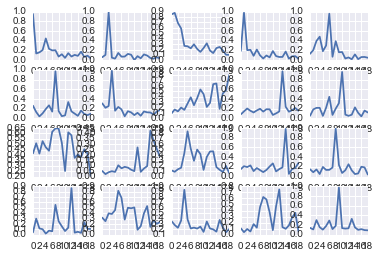

In [109]:
from matplotlib import pyplot as plt
counter = 1
M = temp2.as_matrix(my_keys)
for i in range(M.shape[0]):
    plt.subplot(4,5,i+1)
    plt.plot(M[i,:])
    counter = counter + 1
plt.show()   

cluster
0     Axes(0.125,0.125;0.775x0.775)
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
13    Axes(0.125,0.125;0.775x0.775)
14    Axes(0.125,0.125;0.775x0.775)
15    Axes(0.125,0.125;0.775x0.775)
16    Axes(0.125,0.125;0.775x0.775)
17    Axes(0.125,0.125;0.775x0.775)
18    Axes(0.125,0.125;0.775x0.775)
19    Axes(0.125,0.125;0.775x0.775)
dtype: object

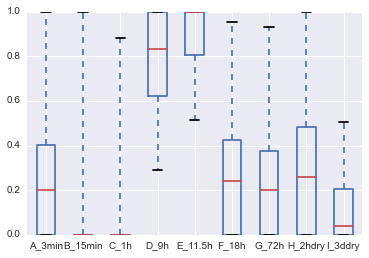

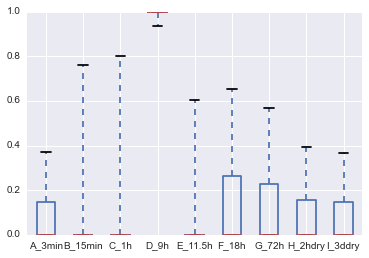

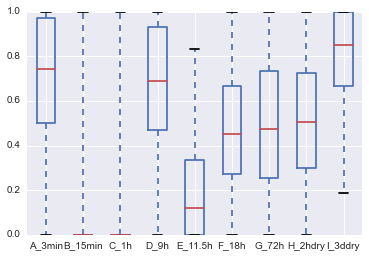

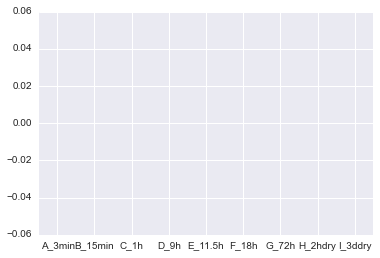

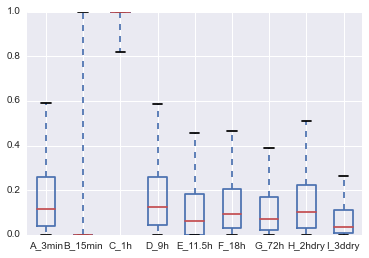

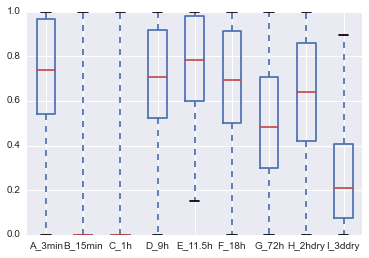

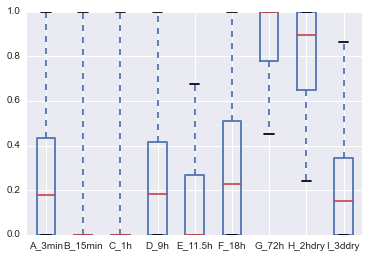

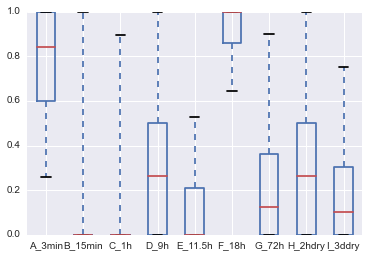

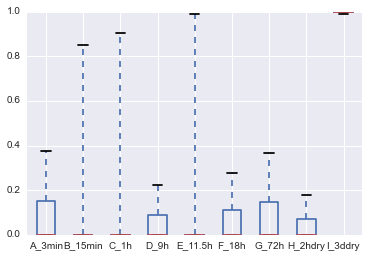

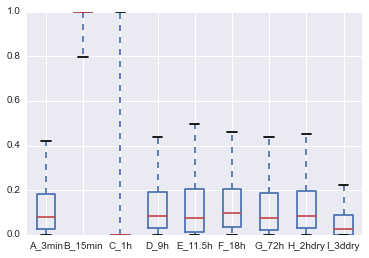

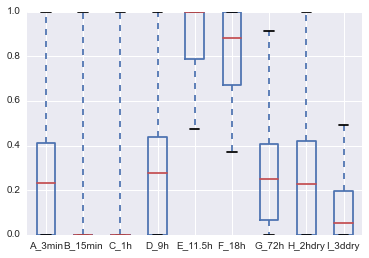

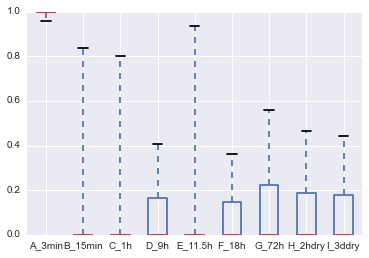

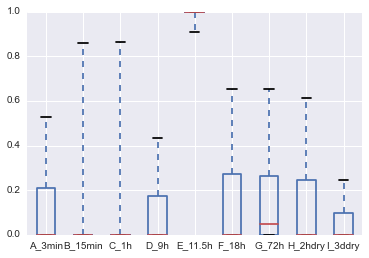

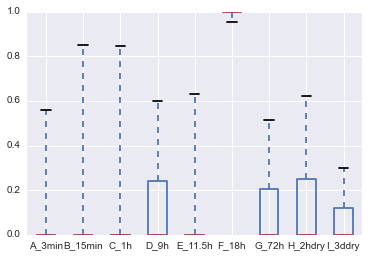

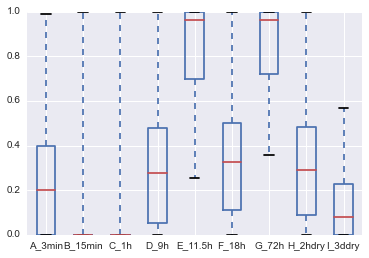

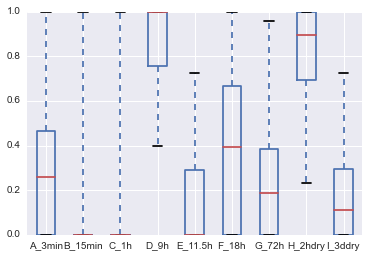

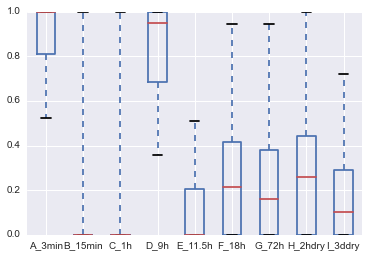

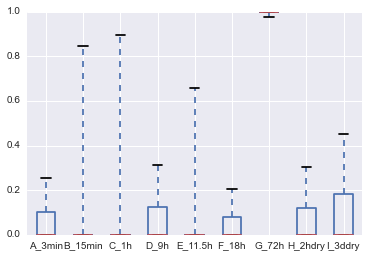

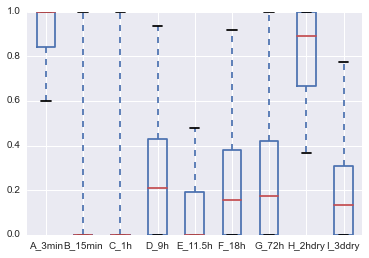

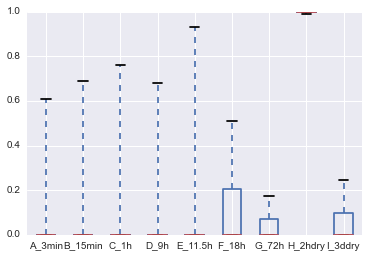

In [29]:
### make a boxplot for each cluster to look at how the bins (gene expression) are distributed

# for ucluster in mtx_bins['cluster'].unique():
#     temp_df = mtx_bins[mtx_bins['cluster'] == ucluster]
#     sns.violinplot(temp_df)

# x_order = ['3 min', '15 min', '1 h', '9 h', '11.5 h', '18 h', 'prior to drydown', '2 h dry', '3 d dry']

mtx_tps_avg.groupby('cluster').plot(kind='box')  
# mtx_bins.groupby('cluster').boxplot()

    

# For large datasets (orfs)(cytoscape), use pdist

In [6]:
my_keys = mtx.keys()
my_keys = my_keys[1:]
print my_keys

Index([u'3min_early', u'3min_earlymid', u'3min_latemid', u'3min_late',
       u'9hr_early', u'9hr_earlymid', u'9hr_latemid', u'18hr_early',
       u'18hr_earlymid', u'18hr_latemid', u'18hr_late', u'42hr_early',
       u'42hr_earlymid', u'42hr_latemid', u'42hr_late', u'49p5hr_early',
       u'49p5hr_earlymid', u'49p5hr_latemid', u'49p5hr_late'],
      dtype='object')


In [7]:
### Need to run for 'data' variable used below

data = mtx.as_matrix(my_keys)

In [8]:
### Calculates correlation distance between all orfs 

from scipy.spatial.distance import pdist, squareform
import time

start = time.time()
my_dist = squareform(pdist(data[:,:],'correlation'))
stop = time.time()
print stop - start

0.00665903091431


In [27]:
# np.save('20160421_my_dist_transporters.npy',my_dist)
# my_dist = np.load('20160421_my_dist_transporters.npy')

In [9]:
### Orfs being written to a list to then add the target and source and value

# ids = mtx_avg_nozeros['orf'].tolist()
ids = mtx['orf'].tolist()
# print ids

In [10]:
print len(ids)
print data.shape
print my_dist.shape

564
(564, 19)
(564, 564)


In [15]:
### change 0.001 below until the network looks less hair-bally


# df = pd.DataFrame()
counter = 0
source = []
target = []
distance = []
for i in range(len(ids)):
    for j in range(len(ids)):
        if i < j:
            if my_dist[i,j] < 0.2:  ##was 0.001 (bigger the number, more matches)
                source.append(ids[i])
                target.append(ids[j])
                distance.append(my_dist[i,j])
#                 counter = counter + 1

In [16]:
with open('cytoscape_clustering/20160629_rploORFs_mets_normvalues_p2.csv','w') as fid:
    for i in range(len(source)):
        fid.write('%s\t%s\t%5.5f\n'%( source[i], target[i], distance[i] ) )

# Filter mtx avg df (delete less intense orfs)

In [11]:
mtx[quant_mtx_keys].head()

,rpkm.AfterDryOut1A_timepoint=72h-priortodrydown_rep=A_MTX,rpkm.AfterDryOut1B_timepoint=72h-priortodrydown_rep=B_MTX,rpkm.AfterDryOut1C_timepoint=72h-priortodrydown_rep=C_MTX,rpkm.AfterDryOut3A_timepoint=2h-afterdrydown_rep=A_MTX,rpkm.AfterDryOut3B_timepoint=2h-afterdrydown_rep=B_MTX,rpkm.AfterDryOut3C_timepoint=2h-afterdrydown_rep=C_MTX,rpkm.AfterWetUp1A_timepoint=3min-afterwetup_rep=A_MTX,rpkm.AfterWetUp1B_timepoint=3min-afterwetup_rep=B_MTX,rpkm.AfterWetUp1C_timepoint=3min-afterwetup_rep=C_MTX,rpkm.AfterWetUp2B_timepoint=15min-afterwetup_rep=B_MTX,...,rpkm.AfterWetUp3C_timepoint=1h-afterwetup_rep=C_MTX,rpkm.AfterWetUp4A_timepoint=9h-afterwetup_rep=A_MTX,rpkm.AfterWetUp4B_timepoint=9h-afterwetup_rep=B_MTX,rpkm.AfterWetUp4C_timepoint=9h-afterwetup_rep=C_MTX,rpkm.AfterWetUp5A_timepoint=11.5h-afterwetup_rep=A_MTX,rpkm.AfterWetUp5C_timepoint=11.5h-afterwetup_rep=C_MTX,rpkm.AfterWetUp6A_timepoint=18h-afterwetup_rep=A_MTX,rpkm.AfterWetUp6B_timepoint=18h-afterwetup_rep=B_MTX,rpkm.DryOut3DaysD5A_timepoint=3d-afterdrydown_rep=A_MTX,rpkm.DryOut3DaysD5B_timepoint=3d-afterdrydown_rep=B_MTX
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.983,1.729,1.339,1.610,1.065,0.821,2.371,1.308,1.299,7.919,...,2.464,0.495,2.691,0.990,1.503,3.414,2.651,1.557,1.673,1.090
3,0.952,2.367,2.575,1.773,2.363,0.078,2.241,0.921,1.213,25.139,...,19.647,1.261,2.823,2.791,1.531,4.069,3.986,1.299,1.502,1.061
4,0.091,0.364,0.324,0.425,0.075,0.158,0.230,0.207,0.304,0.569,...,1.437,0.084,0.695,0.332,0.229,0.403,0.572,0.238,0.567,0.388


In [79]:
# mtx = mtx[(mtx[columns_I_want].T !=0).any()]
# mtx.head()
### Filters df to orfs that have at least one value greater than 10 (~3000 orfs)

mtx_greater5 = mtx_filtered[(mtx_filtered.T > 5).any()]
mtx_greater5.head()
# mtx_greater10.to_csv("20160503_MTX_avg_greater10.csv")

# mtx_greater10 = mtx[(mtx[quant_mtx_keys] > 10).any()]
# mtx_greater10.head()
# mtx_greaterp5.to_csv("20160422_MTX_transporters_avg_greaterp5.csv")

,timepoint=11.5h-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,
k101_1020_20_2,6.0655,4.9110,2.499333,1.3100,2.526333,2.286000,3.078667
k101_1815_42_1,2.8885,5.7950,2.095667,2.0495,4.417667,2.665000,4.395667
k101_2198_51_9,0.2395,0.8560,1.407667,5.5805,2.276000,2.593000,1.380667
k101_26631_689_5,1.8220,3.0175,4.698667,1.5315,1.037000,6.833333,1.062333
k101_44297_1105_1,4.5460,4.9625,5.520333,3.4760,6.236000,5.963333,5.056667


In [53]:
mtx_greater5.shape

(2642, 7)

In [54]:
mtx_greater5.to_csv("20160505_mtx_avg_minus15and1_greater5.csv")

In [12]:
### Get rid of rows that contain ALL zeros

sum_vals = mtx_tps_avg.sum(axis=1)
mtx_avg_nozeros = mtx_tps_avg[sum_vals !=0]
mtx_avg_nozeros.head()


,timepoint=11.5h-afterwetup_MTX,timepoint=15min-afterwetup_MTX,timepoint=18h-afterwetup_MTX,timepoint=1h-afterwetup_MTX,timepoint=2h-afterdrydown_MTX,timepoint=3d-afterdrydown_MTX,timepoint=3min-afterwetup_MTX,timepoint=72h-priortodrydown_MTX,timepoint=9h-afterwetup_MTX
orf,,,,,,,,,
k101_10016_243_1,0.0150,0,0.0000,0,0.000,0.0070,0.017000,0.005000,0.010667
k101_38351_962_4,0.0000,0,0.0135,0,0.000,0.0000,0.000000,0.000000,0.000000
k101_173180_4393_4,0.0000,0,0.0000,0,0.016,0.0045,0.000000,0.006333,0.008000
k101_178603_4538_5,0.0115,0,0.0140,0,0.009,0.0085,0.014667,0.032667,0.017667
k101_190882_4853_1,0.0185,0,0.0000,0,0.000,0.0135,0.048333,0.009667,0.011000


In [13]:
mtx_avg_nozeros.head()
mtx_avg_nozeros.shape

(616, 9)

In [53]:
mtx_avg_nozeros.to_csv('20160414_MTX_zerosdeleted.csv')

In [52]:
mtx_avg.shape

(4027571, 9)

# search block: search columns for something and create new dataframe (i.e. of transporter orfs)

In [4]:
trans_df = mtx[mtx['uniref_maxid.target.annotation'].astype(str).str.contains("transporter")]
# trans_df.to_csv('20160413_transporter_containing_orfs.csv')
trans_df.shape

# trans_df = mtx[mtx['uniref_maxid.target.annotation'].astype(str).str.contains("nif")]
# # trans_df.head()
# trans_df.to_csv('20160415_nif_containing_orfs.csv')

(73701, 146)

In [ ]:
u = trans_df['uniref_maxid.target.annotation'].unique()
for a in u:
    print a

# Groupby bins and sum them

In [ ]:
# data.groupby(['col1', 'col2'])['col3'].mean()
g= mtx.groupby(['scaffold.bin']).sum()

In [ ]:
# g.to_pickle('grouped_by_bin.pkl')
g.to_csv('sum_grouped_by_bin.csv')

# Get column keys for operations below

In [ ]:
mf = reload(mf)

### get list of keys that contain these words, function requires 2 variables), RETURNS a list of keys

annotation_keys = mf.filter_list_by_two_conditions(mtx.keys(),'uniref','interpro')
quant_mtx_keys = mf.filter_list_by_two_conditions(mtx.keys(),'_MTX','_MTX')
quant_mg_keys = mf.filter_list_by_two_conditions(mtx.keys(),'_MG','_MG')
bin_key = 'scaffold.bin'

In [ ]:
annotation_only_df= mtx[annotation_keys]
annotation_only_df.head()

In [ ]:
mtx[key_orient].head()

# For metatransciptome, Get the sum of all rpkm for each bin

In [ ]:
### adding the specified columns together into a new df then summing the bins (could leave out groupby if you want all orf rows instead)

g= mtx[[bin_key] + quant_mtx_keys].groupby([bin_key],axis=0).sum()

# take mean of replicates

In [ ]:
### Groupby: default, axis 0 = rows, axis 1 = columns
### For columns, need to specify level, 0 = all (if levels not created)

In [ ]:
mtx_allorfs = mtx[[bin_key] + quant_mtx_keys].groupby([bin_key],axis=0).sum()

# group by annotation

In [ ]:
# KO or COG would be much better than the name of the uniprot hit
g_a_c= mtx[['uniref_maxid.target.annotation'] + quant_mtx_keys].groupby(['uniref_maxid.target.annotation'],axis=0).count()


In [ ]:
g_a_c.iloc[:,0]

In [ ]:
g_a= mtx[['uniref_maxid.target.annotation'] + quant_mtx_keys].groupby(['uniref_maxid.target.annotation'],axis=0).sum()
g_a_m = g_a.groupby(level=0,axis=1).mean()


In [ ]:
g_a.head()

In [ ]:
# for k in mtx.keys():
#     print k
# print mtx.uniref_maxid.unique()[:3]
# print mtx.u
# mtx["uniref_maxid.target.uniprotid"].unique()[:3]

In [ ]:
# for col in mtx:
#     mtx[col].str.contains('transporter')

# Cluster using kmeans

# Convert sequences to COG


In [ ]:
### Create a txt file with amino acid sequence

with open('tami_test_seq.fa','w') as fid:
    for i in range(100):
        fid.write('>seq%d\n'%i)
        fid.write('%s\n'%mtx['orftrseq'][i])
        

In [ ]:
# http://orthomcl.org/orthomcl/proteomeUpload.do
